Deterministic exponential Growth Model

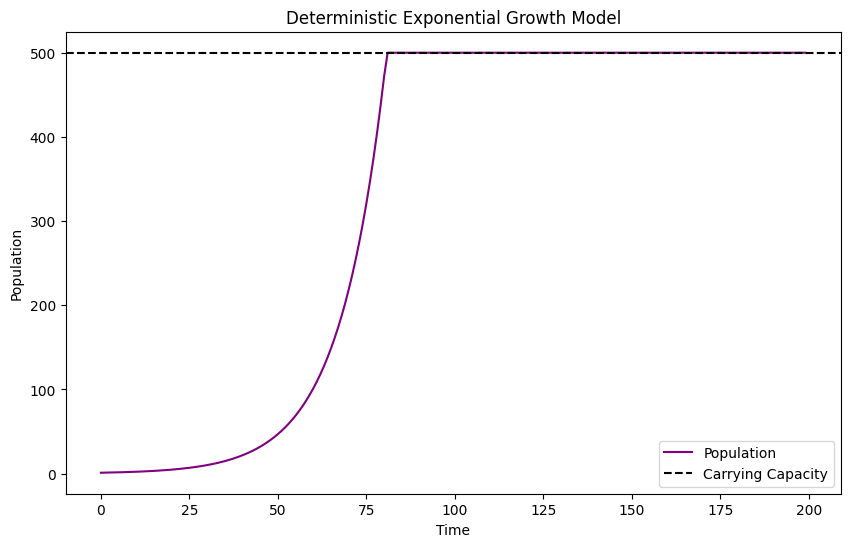

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def exp_growth_model(b, d, K, P0, time_steps, dt):
   
    r = b - d  #growth rate
    population = np.zeros(time_steps)
    population[0] = P0

    for t in range(1, time_steps):
        P = population[t-1]
        dP = r * P
        population[t] = P + dP
        if population[t] >= K:
            population[t:] = K
            break

    return population

def exp_growth_sol(b, d, K, P0, t):
    return K/(1+ (K-P0)/P0 * np.exp(-(b-d)*t))


def plot_population(population, K, time_steps):
   
    plt.figure(figsize=(10, 6))
    plt.plot(range(time_steps), population, color='purple', label='Population')
    plt.axhline(y=K, color='black', linestyle='--', label='Carrying Capacity')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Deterministic Exponential Growth Model')
    plt.legend()
    plt.show()

#Parameters
def model():
    b = 0.1  
    d = 0.02  
    K = 500  
    P0 = 1  
    time_steps = 200 
    dt = 1  

    population = exp_growth_model(b, d, K, P0, time_steps, dt)
    
    #Plot results
    plot_population(population, K, time_steps)

#Run main function
if __name__ == "__main__":
    model()
